In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sat Feb ,3 2018

@author: JQ
"""

#############################################
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# set directory
os.chdir('/Users/test2/Downloads')

# import potable water data
potable = pd.read_csv('UNdata_Export_PercPotableWater.csv')

# process potable:
df_potable = potable.drop(['Value Footnotes'], axis = 1)
df_potable = df_potable.pivot(index='Year', columns='Country or Area', values='Value')
df_potable['medianPotable'] = df_potable.median(axis=1)
df_potable = df_potable.reset_index()

# process the life expectancy
lifeExp = pd.read_csv('WHO_lifeExpectancy.csv', skiprows=1)

# simplify and just keep the first three columns, so can use the combined life expectancy at birth
lifeExp = lifeExp[['Country', 'Year', 'Both sexes']]

# now collect the 2015 data, which is the latest in the WHO data
potable2015 = potable[potable['Year'] == 2015]
life2015 = lifeExp[lifeExp['Year'] == 2015]

# merge dataframes
df_2015 = pd.merge(left = life2015[['Country', 'Both sexes']], right = potable2015[['Value', 'Country or Area']], how = 'inner', left_on = 'Country', right_on = 'Country or Area')
df_2015 = df_2015.drop(['Country or Area'], axis=1)

df_2015.head()

,Country,Both sexes,Value
0,Afghanistan,60.5,55.3
1,Albania,77.8,95.1
2,Algeria,75.6,83.6
3,Angola,52.4,49.0
4,Antigua and Barbuda,76.4,97.9


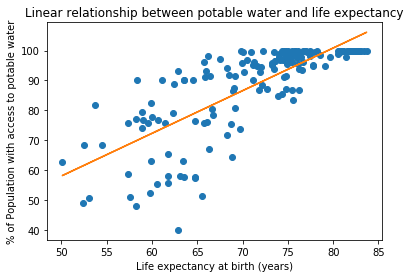

In [7]:
# linear fit
from scipy import stats

# select the data for each variable
x = pd.to_numeric(df_2015["Both sexes"])
y = pd.to_numeric(df_2015["Value"])

# create mask to hide the nan values in the Value column (% pop with access to potable water)
mask = ~np.isnan(x) & ~np.isnan(y)

# run linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x[mask],y[mask])
line = slope*x+intercept

# plot scatterplot and fitted line
fig = plt.figure()
plt.plot(x, y, 'o', x, line)
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel('% of Population with access to potable water')
plt.title('Linear relationship between potable water and life expectancy')
plt.show()

In [8]:
print(r_value)
# a respectable r-squared value

0.77397872863
